# Evaluation of the processed amplitude

# Setup

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotting_util
from reportlab.lib import pagesizes
from reportlab.lib.units import mm
from reportlab.lib import pagesizes
A6_LS = pagesizes.landscape(pagesizes.A6)
PAGE_SMALL = (160 * mm, 80 * mm)

import configuration as cfg


# Umrechnung von Amplitude auf Schallpegel (RMS) \[dB\]

Pseudocode Umrechnungsfunktionen:
```python
# a: Amplitude
amp_to_db(a: float) = 20 * log10(a)
amp_to_rms(a: float) = amp_to_db(sqrt((a * a) / 2))
```

In [2]:
def __amp_to_db(amplitude):
    """
    IMPORTANT: Returns a numpy array
    """
    return 20 * np.log10(amplitude)

def amp_to_rms(amplitude):
    amplitude = np.array(amplitude)
    return __amp_to_db(np.sqrt((np.multiply(amplitude, amplitude)) / 2))


if __name__ == "__main__":
    print("test")
    print(amp_to_rms([0, 0.25, 0.5, 0.75, 1]))
    print(amp_to_rms([1, 0.75, 0.5, 0.25, 0]))

test
[        -inf -15.05149978  -9.03089987  -5.50907469  -3.01029996]
[ -3.01029996  -5.50907469  -9.03089987 -15.05149978         -inf]


C:\Users\Levin\AppData\Local\Temp\ipykernel_10736\3952447410.py:5: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(amplitude)


C:\Users\Levin\AppData\Local\Temp\ipykernel_10736\3214076550.py:12: RuntimeWarning: divide by zero encountered in true_divide
  hyperbola = optimal_a / t


<Figure size 640x480 with 0 Axes>

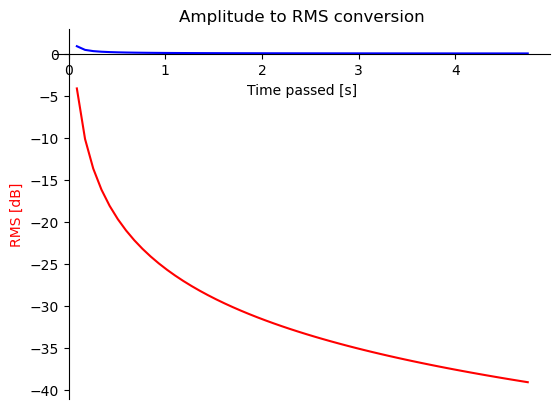

In [3]:
optimal_a = 0
_y_axis_limit = 0
_len_symm_array = 0

# Load "optimal a" value from file
with open("graph_params.txt", "r") as file:
    optimal_a = float(file.readline())
    _y_axis_limit = float(file.readline())
    _len_symm_array = int(file.readline())

t = np.arange(_len_symm_array)
hyperbola = optimal_a / t
plotting_util.plot_amplitude_data(
    "Amplitude to RMS conversion", "Hyperbola (optimal_a)", cfg.averaging_resolution, data1=hyperbola, axis2_name="RMS [dB]", data2=amp_to_rms(hyperbola), graph_on_same_axis=True)

# TODO: Amplitude (ganz am Anfang) auf [0; 1] normieren, da sonst RMS-Werte nicht zwischen (-inf; 0) liegen